<a href="https://colab.research.google.com/github/ecemay/classifying-sarcastic-headlines/blob/main/detectingsarcasticheadlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install nltk
import nltk 
nltk.download('stopwords', download_dir='E:/div_code/django_env/nltk_data')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to
[nltk_data]     E:/div_code/django_env/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [ ]:
train_data=pd.read_csv("/Train_Data.csv")

In [ ]:
test_data=pd.read_csv("/Test_Data.csv")

In [ ]:
train_data.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [ ]:
test_data.head()

,headline
0,area stand-up comedian questions the deal with...
1,dozens of glowing exit signs mercilessly taunt...
2,perfect response to heckler somewhere in prop ...
3,gop prays for ossoff lossoff
4,trevor noah says the scary truth about trump's...


In [ ]:
test_data.shape

(11066, 1)

In [ ]:
train_data.shape

(44262, 2)

In [ ]:
train_data.dtypes

headline        object
is_sarcastic     int64
dtype: object

checking the null values

In [ ]:
train_data.isnull().any()

headline        False
is_sarcastic    False
dtype: bool

In [ ]:
test_data.isnull().any()

headline    False
dtype: bool

countplot of target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


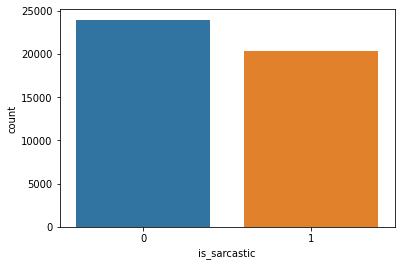

In [ ]:
sns.countplot(train_data.is_sarcastic)

In [ ]:
train_data['headlines_length']=train_data['headline'].str.len()
train_data["headlines_length"]

0        53
1        66
2        65
3        45
4        41
         ..
44257    48
44258    54
44259    80
44260    43
44261    57
Name: headlines_length, Length: 44262, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'headlines distirbution')

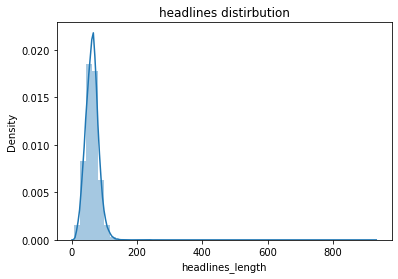

In [ ]:
sns.distplot(train_data["headlines_length"]).set_title("headlines distirbution")

## wordcloud


In [ ]:
def create_wordcloud(words):
    wordcloud=WordCloud(width = 800, height = 800,
                random_state=21,
                max_font_size = 110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()


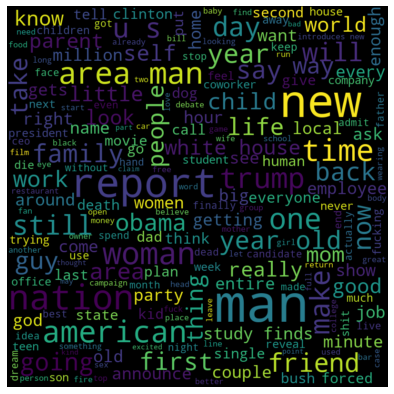

In [ ]:
subset=train_data[train_data.is_sarcastic==1]
text=subset.headline.values
words=' '.join(text)
create_wordcloud(words)

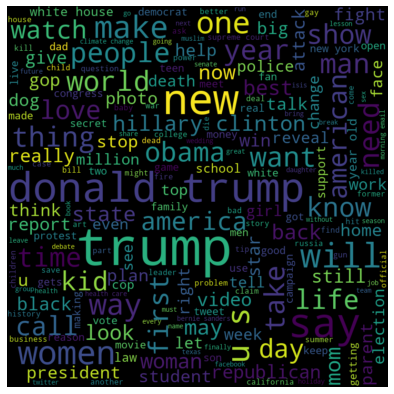

In [ ]:
subset=train_data[train_data.is_sarcastic==0]
text=subset.headline.values
words=' '.join(text)
create_wordcloud(words)

cleaning data

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def process_text(text):
    text=text.lower().replace('\n',' ').replace('\r',' ').strip()
    text=re.sub(' +',' ', text)
    text=re.sub(r'[^\w\s]',' ', text)

    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    filtered_sentence=[w for w in word_tokens if not w in stop_words]
    text=' '.join(filtered_sentence)
    return text

In [ ]:
train_data['headline_parsed']=train_data['headline'].apply(process_text)

In [ ]:
test_data['headline_parsed']=test_data['headline'].apply(process_text)

In [ ]:
train_data.head()

,headline,is_sarcastic,headlines_length,headline_parsed
0,supreme court votes 7-2 to legalize all worldl...,1,53,supreme court votes 7 2 legalize worldly vices
1,hungover man horrified to learn he made dozens...,1,66,hungover man horrified learn made dozens plans...
2,emily's list founder: women are the 'problem s...,0,65,emily list founder women problem solvers congress
3,send your kids back to school with confidence,0,45,send kids back school confidence
4,watch: experts talk pesticides and health,0,41,watch experts talk pesticides health


In [ ]:
test_data=test_data["headline_parsed"]

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(train_data['headline_parsed'],
                                             train_data['is_sarcastic'],
                                             train_size=0.8,
                                             random_state=2)

In [ ]:

X_train=train_data['headline_parsed']

In [ ]:
X_train.head()

0       supreme court votes 7 2 legalize worldly vices
1    hungover man horrified learn made dozens plans...
2    emily list founder women problem solvers congress
3                     send kids back school confidence
4                 watch experts talk pesticides health
Name: headline_parsed, dtype: object

In [ ]:
y_train=train_data['is_sarcastic']

In [ ]:
y_train.head()

0    1
1    1
2    0
3    0
4    0
Name: is_sarcastic, dtype: int64

In [ ]:
X_train.shape

(44262,)

In [ ]:
y_train.shape

(44262,)

In [ ]:
X_test=test_data

In [ ]:
X_test.shape

(11066,)

In [ ]:
X_val.shape

(8853,)

In [ ]:
y_val.shape

(8853,)

In [ ]:
ngram_range=(1,2)
min_df=10
max_df=1.
max_features=300

In [ ]:
tfidf=TfidfVectorizer(encoding='utf-8',
                      ngram_range=ngram_range,
                      stop_words=None,
                      lowercase=False,
                      min_df=min_df,
                      max_df=max_df,
                      max_features=max_features,
                      norm='l2',
                      sublinear_tf=True)
features_train=tfidf.fit_transform(X_train).toarray()
labels_train=y_train

features_val=tfidf.transform(X_val).toarray()
labels_val=y_val

features_test=tfidf.transform(X_test).toarray()


In [ ]:
labels_train.shape

(44262,)

In [ ]:
labels_val.shape

(8853,)

In [ ]:
features_train.shape

(44262, 300)

In [ ]:
features_val.shape

(8853, 300)

## building model


# Yeni Bölüm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(features_train,labels_train)
model_predictions=model.predict(features_val)
print('Accuracy', accuracy_score(labels_val,model_predictions))
print('classification report', classification_report(labels_val,model_predictions))

Accuracy 0.8300011295606009
classification report               precision    recall  f1-score   support

           0       0.80      0.92      0.85      4779
           1       0.88      0.73      0.80      4074

    accuracy                           0.83      8853
   macro avg       0.84      0.82      0.83      8853
weighted avg       0.84      0.83      0.83      8853



In [ ]:
test_predictions=model.predict(features_test)

In [ ]:
test_predictions

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
test_result = pd.DataFrame(test_predictions)

In [ ]:
test_result.head()

,0
0,1
1,0
2,0
3,0
4,0


In [ ]:
test_result.rename(columns = {0:'prediction'}, inplace = True)

In [ ]:
test_result.tail()

,prediction
11061,0
11062,1
11063,0
11064,0
11065,0


In [ ]:
result = pd.concat([test_result, test_data], axis=1, join="inner")

In [ ]:
result.head()

,prediction,headline_parsed
0,1,area stand comedian questions deal drive thru ...
1,0,dozens glowing exit signs mercilessly taunt mu...
2,0,perfect response heckler somewhere prop comedi...
3,0,gop prays ossoff lossoff
4,0,trevor noah says scary truth trump rumored lov...


In [ ]:
result.to_csv('DPhibootcamp.csv', index=False)
